# Figures

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

from ptinsight.common.latency import calculate_latencies
from ptinsight.common.plotting import Plotter

plotter = Plotter("paper", "../images", "tight")

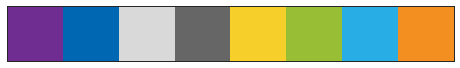

In [2]:
sb.palplot(sb.color_palette())

'lmroman7-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


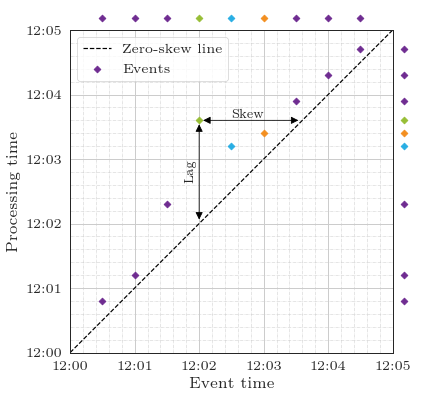

In [18]:
def plot_time_skew_events():
    fig, ax_main, ax_marginal_x, ax_marginal_y = plotter.make_marginal_plot(figsize=[6, 6])

    # Plotting
    #  Ideal
    ax_main.plot([0, 5], [0, 5], linestyle="dashed", label="Zero-skew line", color="black")
    
    #  Actual
    n = 9
    event_time = np.linspace(0.5, 4.5, n) # Steps of 0.5
    processing_time = [0.8, 1.2, 2.3, 3.6, 3.2, 3.4, 3.9, 4.3, 4.7]
    
    def do_scatter(ax, xs, ys, show_label=False):
        for i in range(n):
            if i in range(3, 6):
                color=f"C{i+2}"
            else:
                color="C0"
            if show_label and i == 0:
                label = "Events"
            else:
                label = None
            ax.scatter(xs[i], ys[i], color=color, marker="D", label=label)
            
    do_scatter(ax_main, event_time, processing_time, True)
    #  Marginals
    do_scatter(ax_marginal_x, event_time, [0] * n)
    do_scatter(ax_marginal_y, [0] * n, processing_time)
        
    #  Skew
    ax_main.annotate("", xy=(event_time[3], processing_time[3]),
                    xytext=(processing_time[3], processing_time[3]),
                    arrowprops=dict(arrowstyle="<|-|>, head_length=0.4, head_width=0.2", color="black", shrinkA=4, shrinkB=4))
    ax_main.annotate("Skew", xy=(event_time[3]+0.5, processing_time[3]+0.04), size="small")
    
    # Lag
    ax_main.annotate("", xy=(event_time[3], processing_time[3]),
                    xytext=(event_time[3], event_time[3]),
                    arrowprops=dict(arrowstyle="<|-|>, head_length=0.4, head_width=0.2", color="black", shrinkA=4, shrinkB=4))
    ax_main.annotate("Lag", xy=(event_time[3]-0.04, processing_time[3]-0.92), size="small", rotation=90, ha="right")
    
    # Formatting
    ax_main.set_xticks(range(0, 6))
    ax_main.set_xticklabels(["12:00", "12:01", "12:02", "12:03", "12:04", "12:05"])
    ax_main.set_ylabel("Processing time")
    ax_main.set_yticks(range(0, 6))
    ax_main.set_yticklabels(["12:00", "12:01", "12:02", "12:03", "12:04", "12:05"])
    ax_main.set_xlabel("Event time")
    
    ax_main.set_aspect("equal")
    ax_main.set_ylim([0, 5])
    ax_main.set_xlim([0, 5])
    
    ax_main.legend()
    
    plotter.add_grid(ax_main)
    plotter.apply_tight_layout(fig)
    plotter.save("background_time_skew_events")

plot_time_skew_events()

In [4]:
def plot_time_skew_watermark():
    fig, axs = plotter.make_subplots(figsize=[6, 6])
    ax=axs[0]

    # Plotting
    #  Ideal
    ax.plot([0, 5], [0, 5], linestyle="dashed", label="Ideal")
    
    #  Actual
    t1 = np.linspace(0, 5, 11) # Steps of 0.5
    t2 = np.linspace(0, 5, 300)
    data = [0.1, 0.65, 1.1, 1.8, 2.8, 3.4, 3.1, 3.6, 4.1, 4.65, 5.1]
    interpolated = interp1d(t1, data, kind='quadratic')(t2)
    ax.plot(t2, interpolated, label="Actual")
    
    # Formatting
    ax.set_xticks(range(0, 6))
    ax.set_xticklabels(["12:00", "12:01", "12:02", "12:03", "12:04", "12:05"])
    ax.set_ylabel("Processing Time")
    ax.set_yticks(range(0, 6))
    ax.set_yticklabels(["12:00", "12:01", "12:02", "12:03", "12:04", "12:05"])
    ax.set_xlabel("Event Time")
    
    ax.set_aspect("equal")
    ax.set_ylim([0, 5])
    ax.set_xlim([0, 5])
    
    ax.legend()
    
    plotter.format(fig)
    plotter.save("background_time_skew_watermark")

# plot_time_skew_watermark()